<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Samsung Internal SSD Reviews prediction

Rating predictions using reviews written by users can be a useful problem statement in E-commerce domain and can be used for recommending similar products that may interest users. The dataset in this problem statement comprises reviews pertaining to Samsung Internal SSD product specifically SAMSUNG 850 EVO 2.5" 250GB SATA III 3D NAND Internal Solid State Drive (SSD) MZ-75E250B/AM from the NewEgg Store website.  We will build a Natural Language processing model using Glove embeddings which is trained on reviews given by customers that have used the product and try to predict ratings given a new rating.




### Objective:
Given the reviews provided by customers, can you train a model that accurately predicts the corresponding rating of a review?

### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

- review_title : The Title for the customer review

- overall_review: The whole customer review details

- pros: The customer opinion about the good things in this product

- cons: The customer opinion about the bad things in this product

- ownership_pariod: How long the customer owned this product

- date: When the review was written

- rating_stars: The product rating from 1 to 5

- year: In which year the review was written

- month: In which month the review was written

- day: In which day the review was written

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Model Building

6. Conclusion and Interpretation

7. Food for thought

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive')

Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### Read the dataset and check top 5 rows

In [ ]:
df = pd.read_csv('ssd_reviews.csv')
df.head()

,Unnamed: 0,review_title,overall_review,pros,cons,ownership_pariod,date,rating_stars,year,month,day
0,0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN,years,2019-12-05 12:58:58,5,2019,12,5
1,1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN,years,2019-11-01 08:25:45,5,2019,11,1
2,2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far,years,2019-10-27 17:05:49,5,2019,10,27
3,3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...,years,2019-10-24 18:29:43,5,2019,10,24
4,4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN,years,2019-09-11 19:21:03,5,2019,9,11


### Check info of the dataset and write your findings

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2227 non-null   int64 
 1   review_title      2131 non-null   object
 2   overall_review    1448 non-null   object
 3   pros              2205 non-null   object
 4   cons              2216 non-null   object
 5   ownership_pariod  2159 non-null   object
 6   date              2227 non-null   object
 7   rating_stars      2227 non-null   int64 
 8   year              2227 non-null   int64 
 9   month             2227 non-null   int64 
 10  day               2227 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 191.5+ KB


* There are 2227 rows in the dataset.
* Some rewiew_titles, overall_review and ownership_period are missing.

## 4.  Data Analysis and Preparation

### 4.1 Checking missing values
#### Check for missing values (along with the percentage of null values)

In [ ]:
df.isna().sum()

Unnamed: 0            0
review_title         96
overall_review      779
pros                 22
cons                 11
ownership_pariod     68
date                  0
rating_stars          0
year                  0
month                 0
day                   0
dtype: int64

In [ ]:
df.isna().sum() * 100 / len(df)

Unnamed: 0          0.0000000
review_title        4.3107319
overall_review     34.9797934
pros                0.9878761
cons                0.4939380
ownership_pariod    3.0534351
date                0.0000000
rating_stars        0.0000000
year                0.0000000
month               0.0000000
day                 0.0000000
dtype: float64

### 4.2 Analyzing the target column (Rating_stars)

#### Check the value counts of 'rating_stars' and write your comments

In [ ]:
df['rating_stars'].value_counts()

5    1756
4     181
1     153
3      77
2      60
Name: rating_stars, dtype: int64

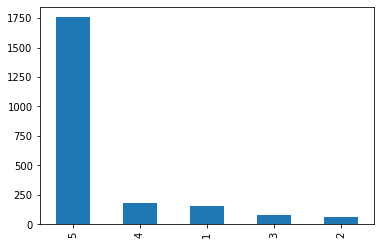

In [ ]:
df['rating_stars'].value_counts().plot(kind='bar')

* Most ratings are concentrated towards 5 stars making it a highly unbalanced dataset.

### 4.3 Let's analyze other features like year, month, and day etc.
#### Check value counts of 'year' and write your observations., Comment on the range of years, frequency of ratings in each year.

In [ ]:
df['year'].value_counts()

2015    1006
2016     605
2017     370
2018     187
2019      46
2014      13
Name: year, dtype: int64

* There are a total of 6 years ranging from 2014 to 2019
* Most ratings were given in year 2015 and 2016 which indicates that most SSDs were sold in those years.

#### Check mean rating for each year and write your findings

In [ ]:
df.groupby('year')['rating_stars'].mean().sort_values(ascending=False)

year
2014   4.9230769
2016   4.5900826
2017   4.5108108
2015   4.4582505
2019   4.3478261
2018   4.3475936
Name: rating_stars, dtype: float64

* As its a highly unbalanced dataset as mentioned above, all mean ratings come closer to 5.

#### Check value counts of 'month' and write your observations. Comment on the frequency of ratings and discuss if the rating count and mean rating is higher/low on certain months.

In [ ]:
df['month'].value_counts()

12    278
2     239
3     234
1     221
4     205
11    191
5     158
9     157
7     144
10    141
6     140
8     119
Name: month, dtype: int64

In [ ]:
df.groupby('month')['rating_stars'].mean().sort_values(ascending=False)

month
7    4.7638889
1    4.6425339
3    4.6111111
6    4.5571429
9    4.5414013
8    4.4789916
11   4.4607330
5    4.4493671
4    4.4195122
2    4.4058577
12   4.3597122
10   4.3049645
Name: rating_stars, dtype: float64

* Ratings are evenly spread accross every month.
* As most ratings are o 5 stars the mean of each month comes closer to 5 with July being highest 4.7 and October being lowest 4.3.

### 4.4 Combine text features
#### Drop all the numerical features ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod'] and ['rating_stars']

In [ ]:
df_numerical = ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod', 'rating_stars']
text_data = df.drop(df_numerical, axis = 1)

In [ ]:
text_data.head()

,review_title,overall_review,pros,cons
0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN
1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN
2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far
3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...
4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN


#### Replace null values (NaN) with blanks

In [ ]:
text_data.fillna(' ', inplace = True)
text_data.isna().sum()

review_title      0
overall_review    0
pros              0
cons              0
dtype: int64

In [ ]:
text_data.head()

,review_title,overall_review,pros,cons
0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,
1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,
2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far
3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...
4,worth the hype,this was the sdd that everyone said to get and...,,


#### Join all text items in a row that have a space in between and Add a new column (with the newly created combined reviews) to the dataframe.

In [ ]:
text_data = text_data.apply(lambda x: ' '.join(x), axis=1)
data = pd.DataFrame(text_data, columns=['combined_reviews'])
data.head()

,combined_reviews
0,solid buy it you will not regret this purchase...
1,nice drive for price even cheaper by todays co...
2,perfect used this drive as my boot drive and o...
3,very snappy os boots quicker os menus pop up q...
4,worth the hype this was the sdd that everyone ...


In [ ]:
data['ratings'] = df['rating_stars']
data.head()

,combined_reviews,ratings
0,solid buy it you will not regret this purchase...,5
1,nice drive for price even cheaper by todays co...,5
2,perfect used this drive as my boot drive and o...,5
3,very snappy os boots quicker os menus pop up q...,5
4,worth the hype this was the sdd that everyone ...,5


#### Check if there are any null values and drop NaN values if any

In [ ]:
data.isna().sum()

combined_reviews    0
ratings             0
dtype: int64

#### Calculate the length of each review and add it to the dataframe

In [ ]:
data['len'] = data['combined_reviews'].apply(lambda x: len(x.split()))
data.head()

,combined_reviews,ratings,len
0,solid buy it you will not regret this purchase...,5,17
1,nice drive for price even cheaper by todays co...,5,40
2,perfect used this drive as my boot drive and o...,5,65
3,very snappy os boots quicker os menus pop up q...,5,42
4,worth the hype this was the sdd that everyone ...,5,28


#### Check summary stats of the length column

In [ ]:
data['len'].describe()

count   2227.0000000
mean      84.4598114
std       87.6934472
min        0.0000000
25%       30.0000000
50%       59.0000000
75%      109.0000000
max     1615.0000000
Name: len, dtype: float64

### 4.5 Analyzing and preparing the text data


#### Set the max length of each review to 25 since it results in faster training (however, you are free to change this)
#### Set max_features to 10000 and embedding size to 50

In [ ]:
max_features = 10000
maxlen = 25
embedding_size = 50

#### Tokenize the cobined text data. You can use the Tokenizer from tensorflow.keras.preprocessing.text. Check the number of samples post tokenization.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer(num_words = max_features)

# fit on text data
token.fit_on_texts(data['combined_reviews'])

# convert to sequences 
X = token.texts_to_sequences(data['combined_reviews'])

print("Num of samples:" , len(X))
print(X[0])

Num of samples: 2227
[232, 93, 6, 19, 54, 22, 829, 10, 248, 162, 16, 830, 550, 145, 7, 264, 126]


In [ ]:
len(token.word_index)

8838

#### Pad the above tokenized reviews data save it as independent features. Use max_len for the same.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['ratings'])
print(x.shape)
print('Number of labels: ', len(y))

(2227, 25)
Number of labels:  2227


In [ ]:
x

array([[   0,    0,    0, ...,    7,  264,  126],
       [1541,  209,   77, ...,   14,  612,  931],
       [  21,   99,  472, ...,   31,   27,   87],
       ...,
       [   1,    8,   12, ...,   31,   27,   87],
       [ 247,   34,   20, ...,   14,    1,  612],
       [   5,  294,   13, ...,   10,  248,   31]], dtype=int32)

#### Check the shape of X (padded tokenized review data) and y (rating_stars) data.

In [ ]:
print(x.shape)
print(y.shape)

(2227, 25)
(2227,)


#### Check the total number of words in the dictionary (of tekenizer)

In [ ]:
num_words = len(token.word_index) + 1
print(num_words)

8839


### 4.6 Compute the glove embeddings. Use the provided txt file for the same.

#### Read the glove embeddings from the file provided titled ‘glove.6B.50d.txt’. And save it to a dictotionary having word and corresponding embedding vector.

In [ ]:
embedding_file = 'glove.6B.50d.txt'
embedding = {}

for o in open(embedding_file):
    word = o.split(" ")[0]
    embd = np.asarray(o.split(" ")[1:] , dtype = 'float32')
    embedding[word] = embd

In [ ]:
len(embedding)

400000

#### Create a weight matrix for words in the training docs

In [ ]:
embedding_matrix = np.zeros((num_words,50))

for word,i in token.word_index.items():
  if word in embedding.keys():
    embedding_matrix[i] = embedding[word]

#### Check length of the embedding

In [ ]:
len(embedding_matrix)

8839

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.11891   ,  0.15255   , -0.082073  , ..., -0.57511997,
        -0.26671001,  0.92120999],
       ...,
       [-0.38949001,  0.070842  ,  0.060221  , ..., -0.12498   ,
         0.21944   ,  0.18415   ],
       [-0.33673999,  0.44661999,  1.08659995, ..., -0.56177002,
        -0.28937   , -0.0086977 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### 4.7 Target Feature:- One hot encode the target variable (rating_stars)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_en = to_categorical(y)
y_en

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

### 4.8 Split the data into Train & Test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_en, test_size = 0.3)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1558, 25) (1558, 6)
(669, 25) (669, 6)


## 5. Model building

### 5.1 Construct a neural network architecture using embedding and LSTM layers for building the rating prediction model.
- Use the num_words, embedding_size from the above tokenizer and embeddings respectively
- Use weights from the above embedding matrix
- Use input length as the maxlen
- Add LSTM layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten

# embedding layer with input_dim, embedding_size, weights, input_length 
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = maxlen) )

# LSTM layer
model.add(LSTM(64, return_sequences = True))

# extract features
model.add(Flatten())

# dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            441950    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 64)            29440     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

### 5.2 Compile the model using appropriate loss, optimizer, and accuracy metric

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

### 5.3 Fit the model

In [ ]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 20, batch_size = 100)

Epoch 1/20
16/16 [==============================] - 32s 78ms/step - loss: 1.2123 - accuracy: 0.6771 - val_loss: 0.8409 - val_accuracy: 0.7788
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8277 - accuracy: 0.8048 - val_loss: 0.8011 - val_accuracy: 0.7788
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7112 - accuracy: 0.7995 - val_loss: 0.7525 - val_accuracy: 0.7788
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6876 - accuracy: 0.7925 - val_loss: 0.7478 - val_accuracy: 0.7788
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5917 - accuracy: 0.8114 - val_loss: 0.7294 - val_accuracy: 0.7758
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5703 - accuracy: 0.8096 - val_loss: 0.7351 - val_accuracy: 0.7743
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5306 - accuracy: 0.7996 - val_loss: 0.7468 - val_accuracy: 0.7788
Epoch 8/20
1

### 5.4 Predict ratings for test data and check accuracy and confusion matrix

In [ ]:
prediction = model.predict(X_test)
prediction

array([[1.5578681e-06, 1.6490319e-05, 2.4727399e-03, 1.4112856e-03,
        2.0537755e-04, 9.9589252e-01],
       [4.5718676e-12, 3.1359195e-09, 1.7706544e-09, 1.2677586e-07,
        9.1540322e-09, 9.9999988e-01],
       [6.0116196e-09, 3.2787343e-06, 1.8542868e-07, 2.0462023e-06,
        6.7673216e-07, 9.9999380e-01],
       ...,
       [5.9796355e-11, 8.7292440e-10, 1.3368214e-07, 3.4006729e-07,
        6.7703053e-07, 9.9999881e-01],
       [2.2400824e-19, 5.1202978e-16, 1.5286867e-13, 2.8089527e-12,
        1.6520723e-13, 1.0000000e+00],
       [1.1515042e-12, 2.5296834e-09, 2.1492320e-10, 8.7167811e-09,
        4.4701438e-09, 1.0000000e+00]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
test_prediction = np.argmax(prediction, axis = 1)
Y_test = np.argmax(y_test, axis = 1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, test_prediction))
print(classification_report(Y_test, test_prediction))

[[ 14   5   2   9  18]
 [  2   3   0   2   8]
 [  3   3   3   3  15]
 [  2   2   2   5  47]
 [  8   4   4  20 485]]
              precision    recall  f1-score   support

           1       0.48      0.29      0.36        48
           2       0.18      0.20      0.19        15
           3       0.27      0.11      0.16        27
           4       0.13      0.09      0.10        58
           5       0.85      0.93      0.89       521

    accuracy                           0.76       669
   macro avg       0.38      0.32      0.34       669
weighted avg       0.72      0.76      0.74       669



### 5.5 Display plot of training and validation loss/accuracy wrt to epochs

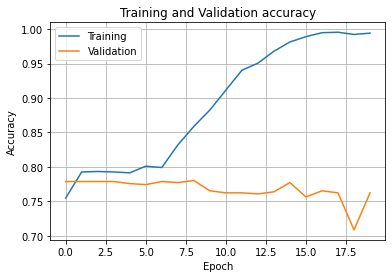

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='best')
plt.grid(True)

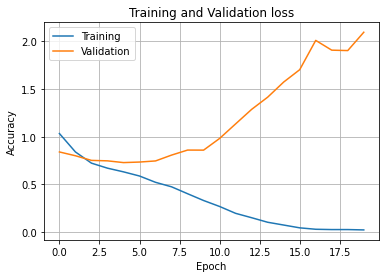

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='best')
plt.grid(True)

## 6. Conclusion and Interpretation

* Heavy class imbalance in the data.
* Test accuracy is coming around 78% and Training accuracy is 99% so the model is overfitted.
* Adding more Dropout and Dense layers might help.
* Class 5 (5 star rating) is having majority of prediction so clubbing the ratings might help in achieving overall accuracy (Class 1+2, 3+4, 5).

## 7. Food for thought:

1.) Change activation function (try leaky_relu or tanh) and see if it helps in improving model performance with the dataset that is highly imbalanced

2.) Try with only the overall review feature and see if it leads to improvement in model performace

3.) Change the hyperparameters of the model and compare the results 

In [ ]:
# trying leaky_relu as activation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from keras.layers import LeakyReLU

# embedding layer with input_dim, embedding_size, weights, input_length 
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = maxlen) )

# LSTM layer
model.add(LSTM(64, return_sequences = True))

# extract features
model.add(Flatten())

# dense layers
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 50)            441950    
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 64)            29440     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 20, batch_size = 100)

Epoch 1/20
16/16 [==============================] - 3s 62ms/step - loss: 1.1420 - accuracy: 0.6637 - val_loss: 0.8293 - val_accuracy: 0.7788
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8018 - accuracy: 0.7939 - val_loss: 0.7681 - val_accuracy: 0.7788
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7538 - accuracy: 0.7860 - val_loss: 0.7509 - val_accuracy: 0.7788
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7156 - accuracy: 0.7803 - val_loss: 0.7335 - val_accuracy: 0.7788
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6297 - accuracy: 0.8002 - val_loss: 0.7327 - val_accuracy: 0.7743
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5765 - accuracy: 0.8019 - val_loss: 0.7349 - val_accuracy: 0.7713
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5227 - accuracy: 0.8203 - val_loss: 0.7514 - val_accuracy: 0.7773
Epoch 8/20
16

* We can conclude that using LeakyRELU as the activation function dosent help much in accuracy.

In [ ]:
# using only overall review feature

text_data_new = df[['overall_review', 'rating_stars']]

In [ ]:
text_data_new.isna().sum()

overall_review    779
rating_stars        0
dtype: int64

In [ ]:
text_data_new.fillna(' ', inplace = True)
text_data_new.isna().sum()

overall_review    0
rating_stars      0
dtype: int64

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer(num_words = max_features)

# fit on text data
token.fit_on_texts(text_data_new['overall_review'])

# convert to sequences 
X = token.texts_to_sequences(text_data_new['overall_review'])

print("Num of samples:" , len(X))
print(X[0])

Num of samples: 2227
[52, 6, 16, 34, 23, 548, 7, 189]


In [ ]:
len(token.word_index)

5472

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['ratings'])
print(x.shape)
print('Number of labels: ', len(y))

(2227, 25)
Number of labels:  2227


In [ ]:
print(x.shape)
print(y.shape)

(2227, 25)
(2227,)


In [ ]:
num_words = len(token.word_index) + 1
print(num_words)

5473


In [ ]:
embedding_matrix = np.zeros((num_words,50))

for word,i in token.word_index.items():
  if word in embedding.keys():
    embedding_matrix[i] = embedding[word]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_en, test_size = 0.3)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1558, 25) (1558, 6)
(669, 25) (669, 6)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten

# embedding layer with input_dim, embedding_size, weights, input_length 
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = maxlen) )

# LSTM layer
model.add(LSTM(64, return_sequences = True))

# extract features
model.add(Flatten())

# dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 25, 50)            273650    
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 64)            29440     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               204928    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 20, batch_size = 100)

Epoch 1/20
16/16 [==============================] - 3s 51ms/step - loss: 1.4510 - accuracy: 0.6159 - val_loss: 1.0196 - val_accuracy: 0.8057
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9526 - accuracy: 0.7923 - val_loss: 0.7893 - val_accuracy: 0.8057
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8712 - accuracy: 0.7662 - val_loss: 0.7422 - val_accuracy: 0.8057
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7240 - accuracy: 0.8020 - val_loss: 0.7320 - val_accuracy: 0.8057
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7611 - accuracy: 0.7839 - val_loss: 0.7431 - val_accuracy: 0.8057
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7579 - accuracy: 0.7716 - val_loss: 0.7437 - val_accuracy: 0.8057
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7224 - accuracy: 0.7752 - val_loss: 0.7358 - val_accuracy: 0.8072
Epoch 8/20
16

* Taking only overall_review feature results in a slight improvement in model performance with a validation accuracy of 80%.

In [ ]:
# using different hyperparameters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Convolution2D, MaxPooling2D,Embedding, LSTM, Dense, Dropout, Flatten
from keras.layers import LeakyReLU

# embedding layer with input_dim, embedding_size, weights, input_length 
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = maxlen))
model.add(BatchNormalization())

# LSTM layer
model.add(LSTM(64, return_sequences = True))

# extract features
model.add(Flatten())

# dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 25, 50)            273650    
_________________________________________________________________
batch_normalization_3 (Batch (None, 25, 50)            200       
_________________________________________________________________
lstm_5 (LSTM)                (None, 25, 64)            29440     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               204928    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [ ]:
# using mse as the loss function

model.compile(loss = 'mse', optimizer='adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 30, batch_size = 100)

Epoch 1/30
16/16 [==============================] - 3s 52ms/step - loss: 0.1123 - accuracy: 0.5504 - val_loss: 0.0654 - val_accuracy: 0.8057
Epoch 2/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0766 - accuracy: 0.7645 - val_loss: 0.0587 - val_accuracy: 0.8057
Epoch 3/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0666 - accuracy: 0.7771 - val_loss: 0.0597 - val_accuracy: 0.8057
Epoch 4/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0607 - accuracy: 0.7918 - val_loss: 0.0589 - val_accuracy: 0.8057
Epoch 5/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0562 - accuracy: 0.7934 - val_loss: 0.0615 - val_accuracy: 0.8072
Epoch 6/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0558 - accuracy: 0.7868 - val_loss: 0.0654 - val_accuracy: 0.8057
Epoch 7/30
16/16 [==============================] - 0s 18ms/step - loss: 0.0487 - accuracy: 0.8188 - val_loss: 0.0597 - val_accuracy: 0.7862
Epoch 8/30
16

* After running the model with additional layers on overall_review feature it doesnt show much difference.